In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import numpy as np 

# Importation

In [146]:
reviews = pd.read_csv("order_reviews_dataset.csv")
products  = pd.read_csv("products_dataset.csv")
customers = pd.read_csv("customers_dataset.csv")
orders = pd.read_csv("orders_dataset.csv")
orders_items = pd.read_csv("order_items_dataset.csv")
product_descr = pd.read_csv("product_category_name_translation.csv")
sellers = pd.read_csv("sellers_dataset.csv")
geolocalisation = pd.read_csv("geolocation_dataset.csv")
payments = pd.read_csv("order_payments_dataset.csv")

# Visualisation

In [147]:
reviews.head(1)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


In [148]:
products.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


In [149]:
customers.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [150]:
orders.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [151]:
orders_items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [152]:
product_descr.head(1)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty


In [153]:
sellers.head(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


In [154]:
geolocalisation.head(1)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP


In [155]:
payments.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [156]:
#Merging the datasets on common keys as shown in the above data schema.
data = customers.merge(orders, on = 'customer_id') \
                .merge(orders_items, on = 'order_id') \
                .merge(reviews, on = 'order_id') \
                .merge(products, on = 'product_id') 

# columns = ['customer_id','customer_unique_id','order_id','product_id', 'order_item_id',
#            'review_score','price', 'order_status','product_category_name']
# data = data[columns].copy()
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,2017-05-27 00:00:00,2017-05-28 02:43:16,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,2018-03-01 00:00:00,2018-03-02 11:11:24,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


# Nettoyage

<AxesSubplot: >

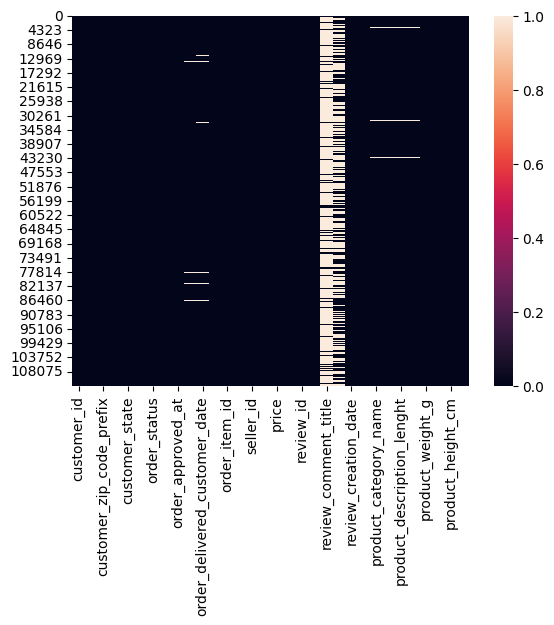

In [157]:
sns.heatmap(data.isna())

In [158]:
data.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112372.000000,112372.000000,112372.000000,112372.000000,112372.000000,110774.000000,110774.000000,110774.000000,112354.000000,112354.000000,112354.000000,112354.000000
mean,35131.880691,1.196010,120.378962,19.977752,4.032473,48.777583,786.793932,2.207124,2090.610882,30.152198,16.576811,23.001210
std,29894.587573,0.691243,182.152386,15.781421,1.387849,10.025179,651.609498,1.719787,3748.608093,16.139323,13.437792,11.707552
min,1003.000000,1.000000,0.850000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,11250.000000,1.000000,39.900000,13.070000,4.000000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,24320.000000,1.000000,74.900000,16.250000,5.000000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,59063.000000,1.000000,134.900000,21.150000,5.000000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,99990.000000,21.000000,6735.000000,409.680000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [159]:
data.count()

customer_id                      112372
customer_unique_id               112372
customer_zip_code_prefix         112372
customer_city                    112372
customer_state                   112372
order_id                         112372
order_status                     112372
order_purchase_timestamp         112372
order_approved_at                112357
order_delivered_carrier_date     111188
order_delivered_customer_date    110012
order_estimated_delivery_date    112372
order_item_id                    112372
product_id                       112372
seller_id                        112372
shipping_limit_date              112372
price                            112372
freight_value                    112372
review_id                        112372
review_score                     112372
review_comment_title              13434
review_comment_message            47642
review_creation_date             112372
review_answer_timestamp          112372
product_category_name            110774


In [160]:

prof = ProfileReport(data)
prof.to_file(output_file='rapport.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/apprenant/miniconda3/envs/potages/lib/python3.9/site-packages/multimethod/__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [161]:
data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

In [162]:
data.customer_zip_code_prefix

0         14409
1         68030
2         68030
3         92480
4         25931
          ...  
112367     1521
112368     4313
112369    68660
112370     5734
112371    37610
Name: customer_zip_code_prefix, Length: 112372, dtype: int64

**DATA ENGINEERING


In [163]:
# creation de la colonne montant 
""" quantiles = pd.qcut(data["montant"], q=5, labels=[1, 2, 3, 4, 5])

# ajout de la colonne de score au dataframe
data["score"] = quantiles
 """

' quantiles = pd.qcut(data["montant"], q=5, labels=[1, 2, 3, 4, 5])\n\n# ajout de la colonne de score au dataframe\ndata["score"] = quantiles\n '

In [164]:
montant  = data.groupby(data.customer_id).sum()

/tmp/ipykernel_31189/1773781589.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  montant  = data.groupby(data.customer_id).sum()


In [165]:
montant

,customer_zip_code_prefix,order_item_id,price,freight_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
customer_id,,,,,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,6273,1,89.80,24.94,1,55.0,889.0,1.0,4267.0,46.0,39.0,22.0
000161a058600d5901f007fab4c27140,35550,1,54.90,12.51,4,57.0,2563.0,2.0,150.0,16.0,2.0,11.0
0001fd6190edaaf884bcaf3d49edf079,29830,1,179.99,15.43,5,45.0,1042.0,2.0,750.0,21.0,23.0,35.0
0002414f95344307404f0ace7a26f1d5,39664,1,149.90,29.45,5,38.0,840.0,1.0,1600.0,40.0,24.0,30.0
000379cdec625522490c315e70c7a9fb,4841,1,93.00,14.01,4,57.0,364.0,2.0,800.0,45.0,10.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,4917,1,78.00,13.91,5,39.0,2244.0,1.0,1250.0,28.0,5.0,22.0
fffecc9f79fd8c764f843e9951b11341,95630,1,54.90,26.46,3,48.0,641.0,3.0,2050.0,50.0,10.0,40.0
fffeda5b6d849fbd39689bb92087f431,22461,1,47.90,15.23,4,59.0,458.0,4.0,350.0,20.0,30.0,20.0


In [166]:
quantiles = pd.qcut(montant["price"], q=5, labels=[1, 2, 3, 4, 5])

In [167]:
quantiles

customer_id
00012a2ce6f8dcda20d059ce98491703    3
000161a058600d5901f007fab4c27140    2
0001fd6190edaaf884bcaf3d49edf079    5
0002414f95344307404f0ace7a26f1d5    4
000379cdec625522490c315e70c7a9fb    3
                                   ..
fffcb937e9dd47a13f05ecb8290f4d3e    3
fffecc9f79fd8c764f843e9951b11341    2
fffeda5b6d849fbd39689bb92087f431    2
ffff42319e9b2d713724ae527742af25    5
ffffa3172527f765de70084a7e53aae8    1
Name: price, Length: 97917, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [168]:
montant["score_montant"] = quantiles


In [169]:
montant

,customer_zip_code_prefix,order_item_id,price,freight_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,score_montant
customer_id,,,,,,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,6273,1,89.80,24.94,1,55.0,889.0,1.0,4267.0,46.0,39.0,22.0,3
000161a058600d5901f007fab4c27140,35550,1,54.90,12.51,4,57.0,2563.0,2.0,150.0,16.0,2.0,11.0,2
0001fd6190edaaf884bcaf3d49edf079,29830,1,179.99,15.43,5,45.0,1042.0,2.0,750.0,21.0,23.0,35.0,5
0002414f95344307404f0ace7a26f1d5,39664,1,149.90,29.45,5,38.0,840.0,1.0,1600.0,40.0,24.0,30.0,4
000379cdec625522490c315e70c7a9fb,4841,1,93.00,14.01,4,57.0,364.0,2.0,800.0,45.0,10.0,34.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,4917,1,78.00,13.91,5,39.0,2244.0,1.0,1250.0,28.0,5.0,22.0,3
fffecc9f79fd8c764f843e9951b11341,95630,1,54.90,26.46,3,48.0,641.0,3.0,2050.0,50.0,10.0,40.0,2
fffeda5b6d849fbd39689bb92087f431,22461,1,47.90,15.23,4,59.0,458.0,4.0,350.0,20.0,30.0,20.0,2


In [170]:
data_date_max = data.order_purchase_timestamp.max

In [171]:
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,2017-05-27 00:00:00,2017-05-28 02:43:16,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,2018-03-01 00:00:00,2018-03-02 11:11:24,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,f6c6d3e1e20969a5eed982163f959719,fb354969e06f2093c0083cbfbb91864e,1521,sao paulo,SP,b2f58affcc178fea2daaf834f1acff5e,delivered,2018-07-14 14:08:11,2018-07-17 04:31:33,2018-07-25 11:18:00,...,2018-07-27 00:00:00,2018-07-29 22:34:18,casa_conforto,32.0,373.0,1.0,1500.0,45.0,30.0,45.0
112368,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,sao paulo,SP,c8203bb57639618630affac9e8e923dd,delivered,2017-03-27 23:04:18,2017-03-27 23:23:38,2017-03-28 14:18:59,...,2017-03-31 00:00:00,2017-04-04 01:37:20,pet_shop,43.0,779.0,1.0,300.0,16.0,16.0,16.0
112369,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,sao miguel do guama,PA,45b3000bcd10464ac178f32cd783fc83,delivered,2017-12-07 23:55:46,2017-12-09 23:50:32,2017-12-11 20:29:02,...,2018-01-06 00:00:00,2018-01-07 14:33:35,beleza_saude,40.0,1694.0,1.0,2400.0,33.0,10.0,16.0
112370,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,sao paulo,SP,49645a8902c1ba980836b7bff991d69f,delivered,2018-04-04 17:50:52,2018-04-04 18:08:41,2018-04-05 16:36:49,...,2018-04-07 00:00:00,2018-04-11 13:34:08,fashion_bolsas_e_acessorios,29.0,498.0,4.0,300.0,16.0,16.0,11.0


In [172]:
data.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
review_id                         object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
product_category

In [173]:
data["date_achat"] = data["order_purchase_timestamp"].str[:10]

In [174]:
data['date_achat'] = pd.to_datetime(data['date_achat'])

In [175]:
data.sort_values(by='date_achat', inplace = True) 

In [176]:
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,date_achat
108879,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,...,2016-11-15 16:00:34,moveis_decoracao,41.0,754.0,3.0,1800.0,32.0,6.0,28.0,2016-09-04
22479,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,...,2016-11-15 16:00:34,moveis_decoracao,59.0,426.0,2.0,1400.0,32.0,6.0,28.0,2016-09-04
104759,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,99025,passo fundo,RS,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaN,...,2016-10-30 01:47:48,telefonia,42.0,381.0,1.0,700.0,25.0,2.0,25.0,2016-09-05
77060,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,...,2016-10-07 18:32:28,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,2016-09-15
77059,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,...,2016-10-07 18:32:28,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,2016-09-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60111,448945bc713d98b6726e82eda6249b9e,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-08-29 09:04:10,2018-08-29 13:03:00,...,2018-09-01 16:57:41,beleza_saude,52.0,1649.0,1.0,250.0,22.0,5.0,15.0,2018-08-29
103043,e60df9449653a95af4549bbfcb18a6eb,5c58de6fb80e93396e2f35642666b693,80045,curitiba,PR,0b223d92c27432930dfe407c6aea3041,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,...,2018-10-24 16:27:36,moveis_cozinha_area_de_servico_jantar_e_jardim,44.0,112.0,1.0,13550.0,48.0,49.0,49.0,2018-08-29
60109,448945bc713d98b6726e82eda6249b9e,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-08-29 09:04:10,2018-08-29 13:03:00,...,2018-09-01 16:57:41,beleza_saude,52.0,1649.0,1.0,250.0,22.0,5.0,15.0,2018-08-29
60107,448945bc713d98b6726e82eda6249b9e,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-08-29 09:04:10,2018-08-29 13:03:00,...,2018-09-01 16:57:41,beleza_saude,52.0,1649.0,1.0,250.0,22.0,5.0,15.0,2018-08-29


In [177]:
data["date_initial"] = data["date_achat"][108879]

In [178]:
data["date_initial"]

108879   2016-09-04
22479    2016-09-04
104759   2016-09-04
77060    2016-09-04
77059    2016-09-04
            ...    
60111    2016-09-04
103043   2016-09-04
60109    2016-09-04
60107    2016-09-04
69405    2016-09-04
Name: date_initial, Length: 112372, dtype: datetime64[ns]

In [179]:
data['diff_days'] = (data['date_initial'] - data['date_achat']) / np.timedelta64(1, 'D')

In [180]:
data.diff_days = data.diff_days.abs()

In [181]:
data.diff_days

108879      0.0
22479       0.0
104759      1.0
77060      11.0
77059      11.0
          ...  
60111     724.0
103043    724.0
60109     724.0
60107     724.0
69405     729.0
Name: diff_days, Length: 112372, dtype: float64

In [182]:
data_rec = data.groupby(data.customer_id).max()

/tmp/ipykernel_31189/2434753024.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  data_rec = data.groupby(data.customer_id).max()


In [183]:
data_rec

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,date_achat,date_initial,diff_days
customer_id,,,,,,,,,,,,,,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP,5f79b5b0931d63f1a42989eb65b9da6e,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,...,55.0,889.0,1.0,4267.0,46.0,39.0,22.0,2017-11-14,2016-09-04,436.0
000161a058600d5901f007fab4c27140,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG,a44895d095d7e0702b6a162fa2dbeced,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,...,57.0,2563.0,2.0,150.0,16.0,2.0,11.0,2017-07-16,2016-09-04,315.0
0001fd6190edaaf884bcaf3d49edf079,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES,316a104623542e4d75189bb372bc5f8d,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,...,45.0,1042.0,2.0,750.0,21.0,23.0,35.0,2017-02-28,2016-09-04,177.0
0002414f95344307404f0ace7a26f1d5,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG,5825ce2e88d5346438686b0bba99e5ee,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,...,38.0,840.0,1.0,1600.0,40.0,24.0,30.0,2017-08-16,2016-09-04,346.0
000379cdec625522490c315e70c7a9fb,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP,0ab7fb08086d4af9141453c91878ed7a,delivered,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,...,57.0,364.0,2.0,800.0,45.0,10.0,34.0,2018-04-02,2016-09-04,575.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,bb438f958261edabbe96fc22622499c4,4917,sao paulo,SP,620ddc9fbe3e445676a8e71d4a830821,delivered,2018-03-17 00:55:27,2018-03-17 01:35:21,2018-03-17 17:58:48,2018-03-21 19:24:46,...,39.0,2244.0,1.0,1250.0,28.0,5.0,22.0,2018-03-17,2016-09-04,559.0
fffecc9f79fd8c764f843e9951b11341,e5794df8573fa179a90a7b797fc4b71f,95630,parobe,RS,814d6a3a7c0b32b2ad929ac6328124e9,delivered,2018-03-29 16:59:26,2018-03-29 17:10:27,2018-03-31 14:29:38,2018-04-10 17:20:49,...,48.0,641.0,3.0,2050.0,50.0,10.0,40.0,2018-03-29,2016-09-04,571.0
fffeda5b6d849fbd39689bb92087f431,afbb5a642107cf6bb1ca68e863175f03,22461,rio de janeiro,RJ,8c855550908247a7eff50281b92167a8,delivered,2018-05-22 13:36:02,2018-05-22 13:54:37,2018-05-25 13:25:00,2018-06-08 18:03:31,...,59.0,458.0,4.0,350.0,20.0,30.0,20.0,2018-05-22,2016-09-04,625.0


In [184]:
quantiles = pd.qcut(data_rec["diff_days"], q=5, labels=[1, 2, 3, 4, 5])

In [185]:
data_rec["score_rec"] = quantiles

creation de la frequence 

In [186]:
data.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,date_achat,date_initial,diff_days
108879,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,...,41.0,754.0,3.0,1800.0,32.0,6.0,28.0,2016-09-04,2016-09-04,0.0
22479,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,...,59.0,426.0,2.0,1400.0,32.0,6.0,28.0,2016-09-04,2016-09-04,0.0
104759,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,99025,passo fundo,RS,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaN,...,42.0,381.0,1.0,700.0,25.0,2.0,25.0,2016-09-05,2016-09-04,1.0
77060,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,...,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,2016-09-15,2016-09-04,11.0
77059,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,...,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,2016-09-15,2016-09-04,11.0
77058,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,...,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,2016-09-15,2016-09-04,11.0
110310,b106b360fe2ef8849fbbd056f777b4d5,0eb1ee9dba87f5b36b4613a65074337c,2975,sao paulo,SP,71303d7e93b399f5bcd537d124c0bcfa,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaN,...,32.0,561.0,1.0,500.0,18.0,18.0,18.0,2016-10-02,2016-09-04,28.0
99476,b8cf418e97ae795672d326288dfab7a7,8d3a54507421dbd2ce0a1d58046826e0,13185,hortolandia,SP,d207cc272675637bfed0062edffd0818,delivered,2016-10-03 22:06:03,2016-10-04 10:28:07,2016-10-21 14:23:37,...,55.0,130.0,1.0,2050.0,40.0,11.0,34.0,2016-10-03,2016-09-04,29.0
90816,355077684019f7f60a031656bd7262b8,32ea3bdedab835c3aa6cb68ce66565ef,4106,sao paulo,SP,3b697a20d9e427646d92567910af6d57,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,...,63.0,1642.0,3.0,300.0,16.0,16.0,16.0,2016-10-03,2016-09-04,29.0
100665,dc607dc98d6a11d5d04d9f2a70aa6c34,10e89fd8e5c745f81bec101207ba4d7d,35162,ipatinga,MG,ef1b29b591d31d57c0d7337460dd83c9,delivered,2016-10-03 22:51:30,2016-10-04 10:28:19,2016-10-21 14:23:36,...,55.0,248.0,1.0,1800.0,40.0,8.0,30.0,2016-10-03,2016-09-04,29.0


In [187]:
data["dummy"] = 1

In [188]:
df_freq = data.groupby(data.customer_id).sum()

/tmp/ipykernel_31189/1528291405.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_freq = data.groupby(data.customer_id).sum()


In [189]:
df_freq.dummy.unique()

array([ 1,  4,  2,  3,  6,  5,  7,  8, 10, 12, 15, 13,  9, 11, 14, 20, 22,
       21])

In [190]:
df_freq.dummy.nunique()

18

In [191]:
df_freq[df_freq["dummy"] == 2].count()

customer_zip_code_prefix      7850
order_item_id                 7850
price                         7850
freight_value                 7850
review_score                  7850
product_name_lenght           7850
product_description_lenght    7850
product_photos_qty            7850
product_weight_g              7850
product_length_cm             7850
product_height_cm             7850
product_width_cm              7850
diff_days                     7850
dummy                         7850
dtype: int64

In [192]:
quantiles = pd.cut(df_freq["dummy"], bins=5, labels=[1, 2, 3, 4, 5], include_lowest=True)
df_freq["score_freq"] = quantiles


In [193]:
df_freq[df_freq["score_freq"]==2].count()

customer_zip_code_prefix      239
order_item_id                 239
price                         239
freight_value                 239
review_score                  239
product_name_lenght           239
product_description_lenght    239
product_photos_qty            239
product_weight_g              239
product_length_cm             239
product_height_cm             239
product_width_cm              239
diff_days                     239
dummy                         239
score_freq                    239
dtype: int64

In [194]:
df_freq

,customer_zip_code_prefix,order_item_id,price,freight_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,diff_days,dummy,score_freq
customer_id,,,,,,,,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,6273,1,89.80,24.94,1,55.0,889.0,1.0,4267.0,46.0,39.0,22.0,436.0,1,1
000161a058600d5901f007fab4c27140,35550,1,54.90,12.51,4,57.0,2563.0,2.0,150.0,16.0,2.0,11.0,315.0,1,1
0001fd6190edaaf884bcaf3d49edf079,29830,1,179.99,15.43,5,45.0,1042.0,2.0,750.0,21.0,23.0,35.0,177.0,1,1
0002414f95344307404f0ace7a26f1d5,39664,1,149.90,29.45,5,38.0,840.0,1.0,1600.0,40.0,24.0,30.0,346.0,1,1
000379cdec625522490c315e70c7a9fb,4841,1,93.00,14.01,4,57.0,364.0,2.0,800.0,45.0,10.0,34.0,575.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,4917,1,78.00,13.91,5,39.0,2244.0,1.0,1250.0,28.0,5.0,22.0,559.0,1,1
fffecc9f79fd8c764f843e9951b11341,95630,1,54.90,26.46,3,48.0,641.0,3.0,2050.0,50.0,10.0,40.0,571.0,1,1
fffeda5b6d849fbd39689bb92087f431,22461,1,47.90,15.23,4,59.0,458.0,4.0,350.0,20.0,30.0,20.0,625.0,1,1


In [195]:
data2 = data.merge(df_freq, on='customer_id', how='left')
data3 = data2.merge(data_rec, on='customer_id', how='left')
data4 = data3.merge(montant, on='customer_id', how='left')


/tmp/ipykernel_31189/522166048.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'freight_value_x', 'order_item_id_x', 'product_photos_qty_x', 'product_height_cm_x', 'product_length_cm_x', 'product_width_cm_x', 'product_weight_g_x', 'review_score_x', 'product_name_lenght_x', 'product_description_lenght_x', 'price_x', 'customer_zip_code_prefix_x'} in the result is deprecated and will raise a MergeError in a future version.
  data4 = data3.merge(montant, on='customer_id', how='left')


In [196]:
data4

,customer_id,customer_unique_id_x,customer_zip_code_prefix_x,customer_city_x,customer_state_x,order_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,...,freight_value_y,review_score_y,product_name_lenght_y,product_description_lenght_y,product_photos_qty_y,product_weight_g_y,product_length_cm_y,product_height_cm_y,product_width_cm_y,score_montant
0,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,...,63.34,2,100.0,1180.0,5.0,3200.0,64.0,12.0,56.0,3
1,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,...,63.34,2,100.0,1180.0,5.0,3200.0,64.0,12.0,56.0,3
2,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,99025,passo fundo,RS,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaN,...,15.56,1,42.0,381.0,1.0,700.0,25.0,2.0,25.0,2
3,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,...,8.49,3,102.0,3108.0,3.0,3000.0,48.0,48.0,48.0,4
4,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,...,8.49,3,102.0,3108.0,3.0,3000.0,48.0,48.0,48.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,448945bc713d98b6726e82eda6249b9e,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-08-29 09:04:10,2018-08-29 13:03:00,...,39.50,25,260.0,8245.0,5.0,1250.0,110.0,25.0,75.0,5
112368,e60df9449653a95af4549bbfcb18a6eb,5c58de6fb80e93396e2f35642666b693,80045,curitiba,PR,0b223d92c27432930dfe407c6aea3041,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,...,92.96,10,88.0,224.0,2.0,27100.0,96.0,98.0,98.0,5
112369,448945bc713d98b6726e82eda6249b9e,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-08-29 09:04:10,2018-08-29 13:03:00,...,39.50,25,260.0,8245.0,5.0,1250.0,110.0,25.0,75.0,5
112370,448945bc713d98b6726e82eda6249b9e,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-08-29 09:04:10,2018-08-29 13:03:00,...,39.50,25,260.0,8245.0,5.0,1250.0,110.0,25.0,75.0,5


In [197]:
data4.columns

Index(['customer_id', 'customer_unique_id_x', 'customer_zip_code_prefix_x',
       'customer_city_x', 'customer_state_x', 'order_id_x', 'order_status_x',
       'order_purchase_timestamp_x', 'order_approved_at_x',
       'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x', 'order_item_id_x', 'product_id_x',
       'seller_id_x', 'shipping_limit_date_x', 'price_x', 'freight_value_x',
       'review_id_x', 'review_score_x', 'review_comment_title',
       'review_comment_message', 'review_creation_date_x',
       'review_answer_timestamp_x', 'product_category_name',
       'product_name_lenght_x', 'product_description_lenght_x',
       'product_photos_qty_x', 'product_weight_g_x', 'product_length_cm_x',
       'product_height_cm_x', 'product_width_cm_x', 'date_achat_x',
       'date_initial_x', 'diff_days_x', 'dummy_x',
       'customer_zip_code_prefix_y', 'order_item_id_y', 'price_y',
       'freight_value_y', 'review_score_y', 'p

In [198]:
data4.dtypes

customer_id                     object
customer_unique_id_x            object
customer_zip_code_prefix_x       int64
customer_city_x                 object
customer_state_x                object
                                ...   
product_weight_g_y             float64
product_length_cm_y            float64
product_height_cm_y            float64
product_width_cm_y             float64
score_montant                 category
Length: 96, dtype: object

In [199]:
data4["score_montant"] = data4["score_montant"].astype(int)
data4["score_rec"] = data4["score_rec"].astype(int)
data4["score_freq"]= data4["score_freq"].astype(int)
# Ajout de la colonne score_rfm
data4["score_rfm"] = data4["score_montant"] + data4["score_rec"]+data4["score_freq"]


In [200]:
data4.score_rfm.unique()

array([ 5,  4,  6,  3,  7,  8, 10,  9, 12, 11, 13])

In [201]:
data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'date_achat', 'date_initial',
       'diff_days', 'dummy'],
      dtype='object')

In [202]:
data4.columns

Index(['customer_id', 'customer_unique_id_x', 'customer_zip_code_prefix_x',
       'customer_city_x', 'customer_state_x', 'order_id_x', 'order_status_x',
       'order_purchase_timestamp_x', 'order_approved_at_x',
       'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x', 'order_item_id_x', 'product_id_x',
       'seller_id_x', 'shipping_limit_date_x', 'price_x', 'freight_value_x',
       'review_id_x', 'review_score_x', 'review_comment_title',
       'review_comment_message', 'review_creation_date_x',
       'review_answer_timestamp_x', 'product_category_name',
       'product_name_lenght_x', 'product_description_lenght_x',
       'product_photos_qty_x', 'product_weight_g_x', 'product_length_cm_x',
       'product_height_cm_x', 'product_width_cm_x', 'date_achat_x',
       'date_initial_x', 'diff_days_x', 'dummy_x',
       'customer_zip_code_prefix_y', 'order_item_id_y', 'price_y',
       'freight_value_y', 'review_score_y', 'p

In [205]:
data6 = data4[['customer_id', 'order_approved_at_x','order_id',
        'shipping_limit_date_x',
       'review_comment_message', 
       'review_answer_timestamp_x', 'product_category_name', 'order_item_id_y',
       'customer_city_y', 'customer_state_y', , 'order_status_y',
       'seller_id_y', 'price_x', 'freight_value_x', 'review_score_x',   'date_achat_y', 
       'score_rec',  'review_score_y', 'score_montant' ,'score_freq','score_rfm']]


KeyError: "['order_id'] not in index"

In [ ]:
daty = data4[["score_montant","score_rfm",]]

KeyError: "['customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'review_id', 'review_score', 'review_creation_date', 'review_answer_timestamp', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'date_achat', 'date_initial', 'dummy'] not in index"

In [ ]:
data6.to_csv("data_analys.csv")

# Exploration

# Analyse